In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the preprocessed dataset
file_path = '/content/drive/My Drive/Tesi/dbscan_clustering_results_bert.cs'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify it's loaded correctly
dataset

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dataset
df = dataset

# Preprocessing
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['cleaned_comment'] = df['Testo'].apply(preprocess)

# Vectorizzazione TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_comment']).toarray()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

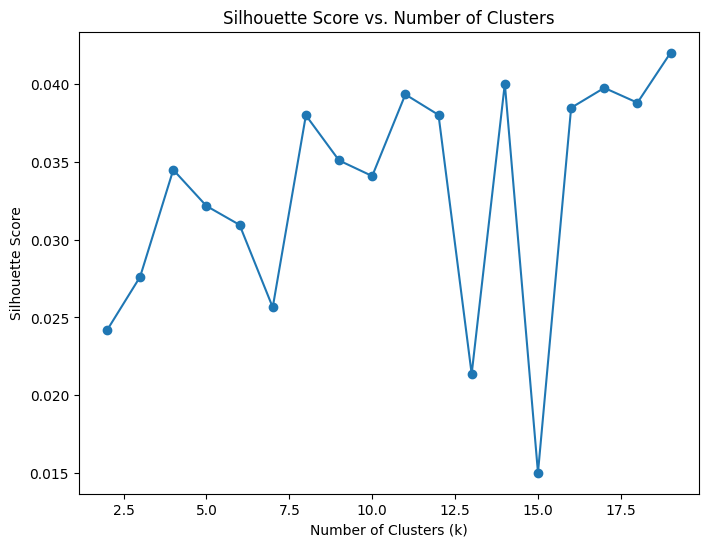

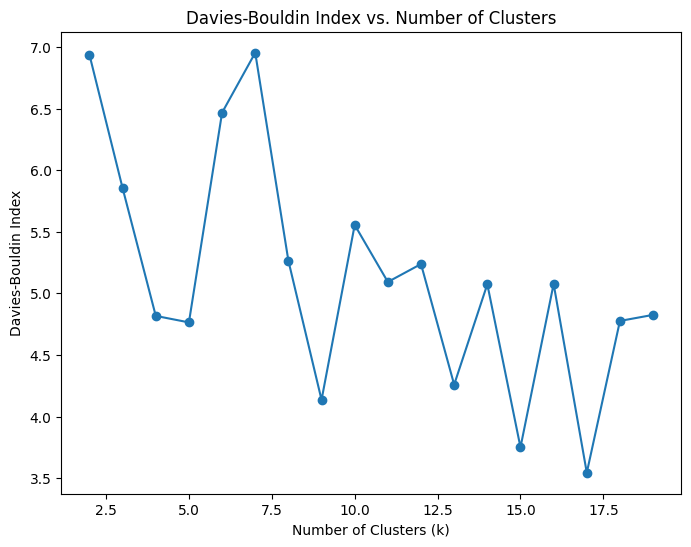

Optimal k based on Silhouette Score: 19
Optimal k based on Davies-Bouldin Index: 17


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster 1
Comment: grazie:)
Comment: grazie 🫶🏻
Comment: Grazie!
Comment: grazie?
Comment: Grazie

Cluster 2
Comment: Ahah
Comment: 🏴
Comment: Mocio.
Comment: Birra.
Comment: Tette.

Cluster 3
Comment: Premetto di essere classe '99 e quindi relativamente giovane.

Sono cresciuto in una casa dove la violenza era all'ordine del giorno. Mia madre veniva picchiata dai suoceri e da mio padre a turno (questo l'ho scoperto molto piu tardi) che poi sfogava su di me fino a quando non sono cresciuto abbastanza da bloccare i colpi. Da mio padre sono stato menato molto raramente, ma quando capitava erano botte serissime (cinghiate, cazzotti, ecc...), per fortuna mai a tal punto da finire in pronto soccorso. Da mia madre erano sculacciate sul sedere quando ero piccolino, che poi sono diventate manate sul viso e sulla bocca crescendo. Ammetto di essermi meritato qualche ceffone, però per quanto riguarda i pestaggi ho avuto paura per molto tempo e sono convinto di avere ancora qualche strascico, ad e

In [ ]:
# prompt:  applicami il k-means algo al dataset vettorizzato X , dammi un codice completo in cui scegli il k ottimale calcolando Silhouette Score e Davies-Bouldin index: 4.371136572139054,stampa il k migliore e per ogni cluster i commenti piu rappresentativi, il plot degli indici fallo in grafici diversi

import pandas as pd
from google.colab import drive
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Caricamento dataset
df = dataset

# Preprocessing (if not already done)
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['cleaned_comment'] = df['Testo'].apply(preprocess)

# Vectorizzazione TF-IDF (if not already done)
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_comment']).toarray()

# Find the optimal k using the elbow method
k_range = range(2, 20)  # Adjust the range as needed
silhouette_scores = []
davies_bouldin_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(X, kmeans.labels_))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

# Plot the Davies-Bouldin indices
plt.figure(figsize=(8, 6))
plt.plot(k_range, davies_bouldin_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index vs. Number of Clusters")
plt.show()

# Choose the k with the highest silhouette score or lowest Davies-Bouldin index
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2
optimal_k_davies_bouldin = davies_bouldin_scores.index(min(davies_bouldin_scores)) + 2

print("Optimal k based on Silhouette Score:", optimal_k_silhouette)
print("Optimal k based on Davies-Bouldin Index:", optimal_k_davies_bouldin)

# Choose one of the optimal k values (you might need to analyze the plots)
optimal_k = optimal_k_silhouette  # Or use optimal_k_davies_bouldin

# Fit the KMeans model with the optimal k
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X)

# For each cluster, print the centroid and the 5 closest comments
for i in range(optimal_k):
    cluster_center = kmeans.cluster_centers_[i]
    distances = np.linalg.norm(X - cluster_center, axis=1)
    closest_indices = np.argsort(distances)[:5]

    print("\nCluster", i + 1)  # Start cluster numbering from 1
    # print("Centroid:", cluster_center)  # You can uncomment this to print centroids
    for index in closest_indices:
        print("Comment:", df['Testo'].iloc[index])


In [ ]:
# prompt: quanti cluster ha generato

print("Il numero di cluster generati è:", optimal_k)


Il numero di cluster generati è: 19


In [ ]:
# prompt: vorrei estrarre i topic principali di ogni cluster

# Get the top keywords for each cluster
top_keywords_per_cluster = []
for i in range(optimal_k):
    cluster_center = kmeans.cluster_centers_[i]
    top_keyword_indices = cluster_center.argsort()[::-1][:10]  # Get indices of top 10 keywords
    top_keywords = [vectorizer.get_feature_names_out()[idx] for idx in top_keyword_indices]
    top_keywords_per_cluster.append(top_keywords)

# Print the top keywords for each cluster
for i, keywords in enumerate(top_keywords_per_cluster):
    print(f"\nCluster {i + 1}:")
    for keyword in keywords:
        print(keyword)



Cluster 1:
il
un
di
si
in
no
che
ti
sono
per

Cluster 2:
ah
ok
non
sapevo
lo
grazie
allora
no
boh
si

Cluster 3:
saranno
ci
che
di
non
comunque
un
ti
anni
il

Cluster 4:
significa
che
non
cosa
di
nelle
sei
hai
ma
guarda

Cluster 5:
io
ho
che
sono
anche
di
mi
non
un
in

Cluster 6:
culo
in
il
per
un
che
ma
ti
di
bel

Cluster 7:
di
che
un
per
non
il
in
la
una
sono

Cluster 8:
preview
format
width
webp
redd
auto
pjpg
https
it
jpeg

Cluster 9:
lol
non
che
di
ma
per
un
anche
io
il

Cluster 10:
la
di
che
per
non
in
il
un
se
con

Cluster 11:
the
to
you
for
is
and
of
it
that
are

Cluster 12:
prova
che
con
ti
un
se
non
in
di
il

Cluster 13:
sempre
di
che
per
il
non
in
la
sono
un

Cluster 14:
grazie
mille
per
ok
consiglio
risposta
il
lo
bro
va

Cluster 15:
this
teenagersita
performed
moderators
automatically
concerns
action
questions
contact
compose

Cluster 16:
non
che
ma
se
di
il
un
ho
in
lo

Cluster 17:
removed
che
se
da
si
la
sei
ti
mi
anche

Cluster 18:
deleted
che
se
in
si
sei
da
fatto
te


In [ ]:
# prompt: salvami i commenti divisi percluster in maniera tale da poter passare tutti i commenti a un llm per estrarre i topic

# Create a dictionary to store comments for each cluster
clustered_comments = {i: [] for i in range(optimal_k)}

# Assign each comment to its cluster
for i, label in enumerate(kmeans.labels_):
    clustered_comments[label].append(df['Testo'].iloc[i])

# Save the clustered comments to separate files
import os

output_directory = "/content/drive/My Drive/clustered_comments"  # Adjust the path as needed
os.makedirs(output_directory, exist_ok=True)

for cluster_id, comments in clustered_comments.items():
    file_path = os.path.join(output_directory, f"cluster_{cluster_id + 1}.txt")
    with open(file_path, "w", encoding="utf-8") as f:
        for comment in comments:
            f.write(comment + "\n")

print("Clustered comments saved to separate files.")


Clustered comments saved to separate files.


In [ ]:
# prompt: stampami il numero di commenti per ogni cluster

# Count the number of comments in each cluster
for cluster_id, comments in clustered_comments.items():
    print(f"Cluster {cluster_id + 1}: {len(comments)} comments")


Cluster 1: 313 comments
Cluster 2: 5413 comments
Cluster 3: 11 comments
Cluster 4: 205 comments
Cluster 5: 2199 comments
Cluster 6: 120 comments
Cluster 7: 390 comments
Cluster 8: 163 comments
Cluster 9: 205 comments
Cluster 10: 2945 comments
Cluster 11: 103 comments
Cluster 12: 263 comments
Cluster 13: 8 comments
Cluster 14: 1887 comments
Cluster 15: 527 comments
Cluster 16: 295 comments
Cluster 17: 22 comments
Cluster 18: 1332 comments
Cluster 19: 170 comments


In [ ]:
# prompt: numero totale di commenti

# Count the total number of comments
total_comments = len(df)
print("Total number of comments:", total_comments)


Total number of comments: 16571


In [ ]:
# prompt: salva i commenti in un file excel dove la prima colonna dice iun che cluster è il commento e la seconda ha il testo del commento

import pandas as pd
# Create a DataFrame to store cluster labels and comments
cluster_df = pd.DataFrame({'Cluster': kmeans.labels_, 'Testo': df['Testo']})

# Increment cluster labels by 1 to start from 1 instead of 0
cluster_df['Cluster'] = cluster_df['Cluster'] + 1

# Save the DataFrame to an Excel file
output_excel_file = "/content/drive/My Drive/clustered_comments_kmeans.xlsx"  # Adjust the path as needed
cluster_df.to_excel(output_excel_file, index=False)

print("Clustered comments saved to Excel file:", output_excel_file)


Clustered comments saved to Excel file: /content/drive/My Drive/clustered_comments_kmeans.xlsx
